# Week 2 Assignment solutions

In this notebook we will be reviewing some possible solutions for the assignments from week 2.

## Exercises / Assignments

* Copy the simulated annealing and genetic algorithm functions out into their own files.
* Add documentation to both the files and the functions.
* Our genetic algorithm function currently only uses recombination. As we saw from the simulated annealing approach mutation is also a powerful tool in locating the optimal solution. Add mutation to the genetic algorithm function using the new_path function we created.
* Our simulated annealing function generated a reasonable solution but there were signs that the approach was limited by our function for creating new paths. Create a new function to generate paths in a different way. Does this improve the performance of the simulated annealing function?

The solutions to the first two parts should be fairly straightforward. I have moved the two algorithms to their own files and added documentation. Your documentation is unlikely to be exactly the same and this is expected. The goal is for the documentation to help you, or someone else, reacquaint yourself with how to use the function.

For the final two parts I will tackle them in reverse order as this will give more options for types of mutation in the genetic algorithm focused section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

### Create a new function to generate paths in a different way. Does this improve the performance of the simulated annealing function?

Our current implementation is below. We are switching two adjacent points.

In [2]:
def new_path(existing_path):
    path = existing_path[:]
    point = random.randint(0, len(path)-2)
    path[point+1], path[point] = path[point], path[point+1]
    return path

Our options are potentially vast. To address the question we don't even need to create a better solution. Some options include:

* Shuffle all the points (very severe, essentially a random search with no learning)
* Take the point off the end and add it to the beginning
* Move the 3rd point to the end
* Move all odd points to the middle
* Randomly switch two points
* Invert sequences of points (currently doing this for 2 points so go longer)
* etc

We will implement the last two suggestions.

In [3]:
def new_path_random(existing_path):
    path = existing_path[:]
    p1 = random.randint(0, len(path)-1)
    p2 = random.randint(0, len(path)-1)
    path[p1], path[p2] = path[p2], path[p1]
    return path


def new_path_inverse(existing_path):
    path = existing_path[:]
    p1 = random.randint(1, len(path)-3)
    p2 = random.randint(p1+2, len(path)-1)
    path[p1:p2] = path[p2-1:p1-1:-1]
    return path


# Passing in lists of numbers we can produce sample output

print('Random')
for i in range(10):
    print(new_path_random([0,1,2,3,4,5,6,7,8,9]))
print('Inverse')
for i in range(10):
    print(new_path_inverse([0,1,2,3,4,5,6,7,8,9]))


Random
[0, 1, 9, 3, 4, 5, 6, 7, 8, 2]
[0, 1, 2, 3, 7, 5, 6, 4, 8, 9]
[0, 1, 2, 7, 4, 5, 6, 3, 8, 9]
[0, 1, 2, 3, 9, 5, 6, 7, 8, 4]
[5, 1, 2, 3, 4, 0, 6, 7, 8, 9]
[4, 1, 2, 3, 0, 5, 6, 7, 8, 9]
[0, 4, 2, 3, 1, 5, 6, 7, 8, 9]
[0, 1, 2, 6, 4, 5, 3, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 8]
[0, 1, 2, 3, 4, 9, 6, 7, 8, 5]
Inverse
[0, 1, 2, 3, 4, 5, 6, 8, 7, 9]
[0, 1, 2, 4, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 7, 6, 8, 9]
[0, 1, 2, 3, 7, 6, 5, 4, 8, 9]
[0, 1, 2, 3, 4, 6, 5, 7, 8, 9]
[0, 1, 2, 7, 6, 5, 4, 3, 8, 9]
[0, 1, 2, 3, 4, 5, 8, 7, 6, 9]
[0, 1, 2, 3, 8, 7, 6, 5, 4, 9]
[0, 1, 6, 5, 4, 3, 2, 7, 8, 9]
[0, 6, 5, 4, 3, 2, 1, 7, 8, 9]


The next step is evaluating the performance. Previously, randomly placed points have been used but it is difficult to establish how good our solution is with this type of data. In addition, we can create a dataset with structured data. 

Placing points on a semicircle we can know that the shortest distance will be approximately the radius multipled by pi.

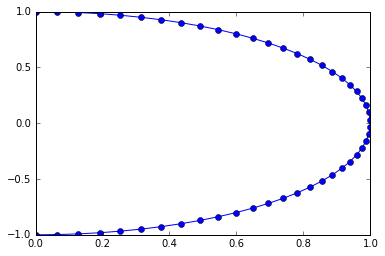

In [4]:
a = np.linspace(-np.pi/2, np.pi/2, 50)
x = np.cos(a)
y = np.sin(a)

coords = [(i,j) for i,j in zip(x,y)]

plt.plot(x, y, 'bo-')

In [5]:
def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance

distance(coords)

3.1410546020222045

Before we can use these points in the optimization algorithms we must shuffle the points. I have created a function for creating this dataset in the data.py file

The documentation can be viewed by calling the help function or using the `variable?` format in a jupyter notebook.

You can also add a docstring at the start of the file. If you ommit it, python will automatically generate a summary based on the functions docstrings. This is shown below.

In [6]:
import data

help(data)

Help on module data:

NAME
    data

FUNCTIONS
    random_coords(num_points=50)
        Generates a path with randomly placed points
        
        Arguments:
        num_points -- The number of points in the path
        
        Returns: List of points
    
    semicircle(num_points=50, radius=1)
        Generates a path with points placed on a semicircle
        
        Arguments:
        num_points -- The number of points in the path
        radius -- The radius of the semicircle
        
        Returns: List of points

FILE
    c:\users\stree\documents\biof509_spring2017\wk02\solution\data.py




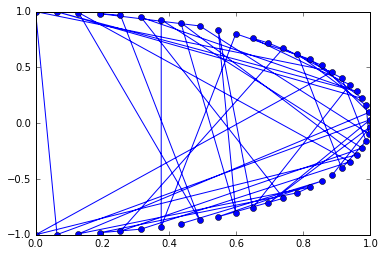

In [7]:
circle_coords = data.semicircle()


fig, ax = plt.subplots(1,1)

ax.plot([i[0] for i in circle_coords], [i[1] for i in circle_coords], 'bo-')

In the evaluation.py file I have created a function to visually compare the performance of multiple optimization functions.

If we know the correct path length we can display this on the plot as a horizontal dashed line.

In [8]:
import evaluation
from simanneal import simulated_annealing_optimizer

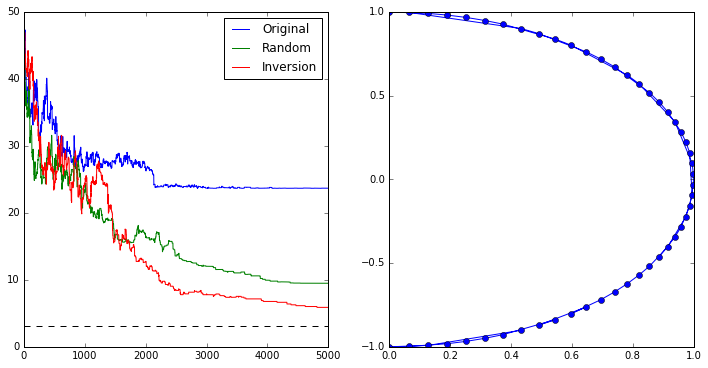

In [9]:
all_results, fig, ax = evaluation.compare_optimization(circle_coords, [{'func':simulated_annealing_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path, 
                                                                              'start_temp':1, 
                                                                              'min_temp':0.01, 
                                                                              'steps':5000},
                                                                'label':'Original'},
                                                               {'func':simulated_annealing_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path_random, 
                                                                              'start_temp':1, 
                                                                              'min_temp':0.01, 
                                                                              'steps':5000},
                                                                'label':'Random'},
                                                               {'func':simulated_annealing_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path_inverse, 
                                                                              'start_temp':1, 
                                                                              'min_temp':0.01, 
                                                                              'steps':5000},
                                                                'label':'Inversion'}], np.pi)

We can also look at the performance on a dataset of randomly created points as we were working with during class.

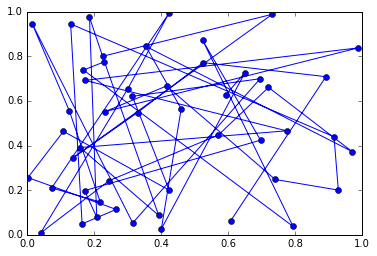

In [10]:
random_coords = data.random_coords()


fig, ax = plt.subplots(1,1)

ax.plot([i[0] for i in random_coords], [i[1] for i in random_coords], 'bo-')

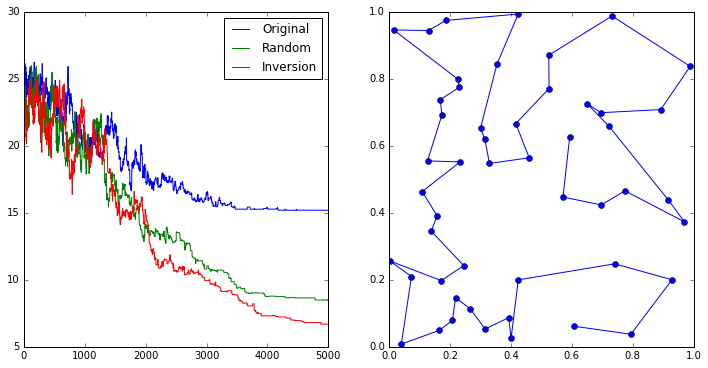

In [11]:
all_results, fig, ax = evaluation.compare_optimization(random_coords, [{'func':simulated_annealing_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path, 
                                                                              'start_temp':1, 
                                                                              'min_temp':0.01, 
                                                                              'steps':5000},
                                                                'label':'Original'},
                                                               {'func':simulated_annealing_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path_random, 
                                                                              'start_temp':1, 
                                                                              'min_temp':0.01, 
                                                                              'steps':5000},
                                                                'label':'Random'},
                                                               {'func':simulated_annealing_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path_inverse, 
                                                                              'start_temp':1, 
                                                                              'min_temp':0.01, 
                                                                              'steps':5000},
                                                                'label':'Inversion'}],)

### Add mutation to the genetic algorithm function using the new_path function we created.

Several people noticed that the best path generated by the genetic algorithm optimizer was not actually being returned. Instead, the first member of the population was returned. This has now been fixed and the algorithm can be found in the genetic.py file.

Our goal here is to add some mutation, an additional source of disorder, to the creation of every new generation.

We will be reusing our new_path functions from the simulated annealing approach.

For short paths and a decent sized starting population mutation is not that important. As the number of points in the path increases or the population size is reduced a little mutation can make a big difference.

**Note:** The following code is quite slow. If were going to further develop this profiling the code to find out which sections are consuming the most time would be useful. When we know where we can make the biggest improvements, then we can look at improving the performance.

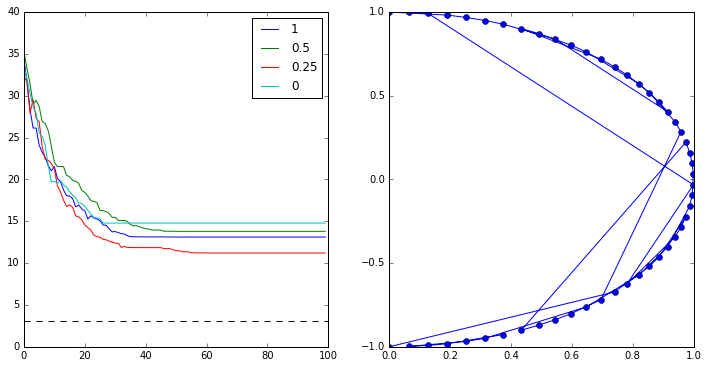

In [12]:
from genetic import genetic_algorithm_optimizer

all_results, fig, ax = evaluation.compare_optimization(circle_coords, [{'func':genetic_algorithm_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path, 
                                                                              'pop_size':500, 
                                                                              'generations':100, 
                                                                              'mutation_rate':1},
                                                                'label':'1'},
                                                               {'func':genetic_algorithm_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path, 
                                                                              'pop_size':500, 
                                                                              'generations':100, 
                                                                              'mutation_rate':0.5},
                                                                'label':'0.5'},
                                                               {'func':genetic_algorithm_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path, 
                                                                              'pop_size':500, 
                                                                              'generations':100, 
                                                                              'mutation_rate':0.25},
                                                                'label':'0.25'},
                                                                {'func':genetic_algorithm_optimizer,
                                                                'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path, 
                                                                              'pop_size':500, 
                                                                              'generations':100, 
                                                                              'mutation_rate':0},
                                                                'label':'0'},], np.pi)

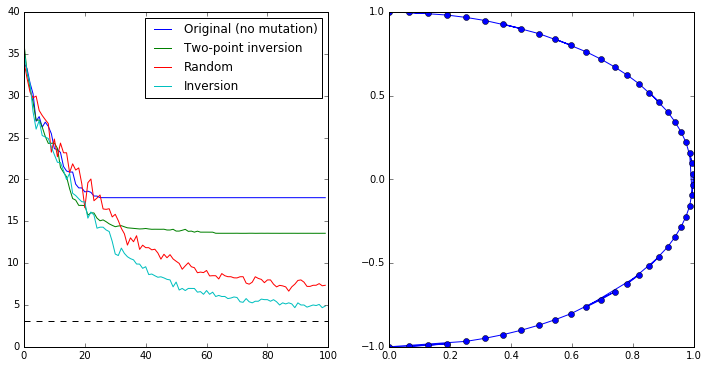

In [13]:
from genetic import genetic_algorithm_optimizer

all_results, fig, ax = evaluation.compare_optimization(circle_coords, [{'func':genetic_algorithm_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path, 
                                                                              'pop_size':500, 
                                                                              'generations':100, 
                                                                              'mutation_rate':0},
                                                                'label':'Original (no mutation)'},
                                                               {'func':genetic_algorithm_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path, 
                                                                              'pop_size':500, 
                                                                              'generations':100, 
                                                                              'mutation_rate':1.},
                                                                'label':'Two-point inversion'},
                                                               {'func':genetic_algorithm_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path_random, 
                                                                              'pop_size':500, 
                                                                              'generations':100, 
                                                                              'mutation_rate':1.},
                                                                'label':'Random'},
                                                               {'func':genetic_algorithm_optimizer,
                                                               'func_params':{'cost_func':distance, 
                                                                              'new_path_func':new_path_inverse, 
                                                                              'pop_size':500, 
                                                                              'generations':100, 
                                                                              'mutation_rate':1.},
                                                                'label':'Inversion'},
                                                                ], np.pi)